## Measuring rotation in Psc-Eri

[Curtis et al. (2019)](https://arxiv.org/pdf/1905.10588.pdf) measured rotation for the Meingast et al. (2019) members o the Psc-Eri stellar stream, and found a clear co-eval structure in rotation-colour space.

Here, we will attempt to recover that same co-eval structure in the 101 stars targeted in that study, using `michael` only.

In [1]:
from michael import janet
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
cmap = sns.color_palette('colorblind', 8)

from jax import random
rng = random.PRNGKey(53)

from astroquery.vizier import Vizier
from astropy.coordinates import Angle
from astropy import units as u

import warnings
warnings.filterwarnings('ignore')

Hi there. Welcome to the good place.


In [2]:
cat = Vizier(catalog ='J/AJ/158/77/table2',
       columns = ['Source', 'RA_ICRS', 'DE_ICRS', 'GBP-GRP', 'Teff', 'Gmag','GMag', 'Prot'])
cat.ROW_LIMIT = -1
psceri_full = cat.get_catalogs(cat.catalog)[0]

In [3]:
from tqdm import tqdm

N = len(psceri_full)

df = pd.DataFrame(index = range(N), columns=['P', 'Perr', 'Pflag'])

for idx in tqdm(np.arange(20, N+1)):
    psceri = psceri_full[idx]
    source = psceri['Source']

    ra_str = psceri['RA_ICRS'].split(' ')
    units_ra = ['h','m','s']
    rep = ''.join([ra_str[i]+units_ra[i] for i in range(3)])
    ra = Angle(rep).to(u.deg)

    dec_str = psceri['DE_ICRS'].split(' ')
    units_dec = ['d','m','s']
    rep = ''.join([dec_str[i]+units_dec[i] for i in range(3)])
    dec = Angle(rep).to(u.deg)

    j = janet(source, ra, dec,
              output_path = "/Users/oliver hall/Research/michael/Examples/PscEri",
              verbose = False)
    
    try:
        j.run(period_range = (psceri['Prot'].min()*0.5, 
                              psceri['Prot'].max()*1.5))
    except:
        continue
    
    df.loc[idx, 'P']= j.results.loc['best', 'overall']
    df.loc[idx, 'Perr']= j.results.loc['best', 'e_overall']
    df.loc[idx, 'Pflag']= j.results.loc['best', 'f_overall']
df['PC'] = np.array(psceri_full['Prot'].data)
df.to_csv('PscEri/PscEri_periods.csv')

  0%|                                                    | 0/82 [00:00<?, ?it/s]

No postcard object will be created for this target.


  0%|          | 0/1901 [00:00<?, ?it/s]

  1%|▌                                           | 1/82 [00:03<04:45,  3.52s/it]

No postcard object will be created for this target.


  0%|          | 0/1455 [00:00<?, ?it/s]

  2%|█                                           | 2/82 [00:06<04:08,  3.11s/it]

No postcard object will be created for this target.


  0%|          | 0/1509 [00:00<?, ?it/s]

  4%|█▌                                          | 3/82 [00:09<04:07,  3.13s/it]

No postcard object will be created for this target.


  0%|          | 0/796 [00:00<?, ?it/s]

  5%|██▏                                         | 4/82 [00:13<04:19,  3.33s/it]

Found star in Sector(s) 4 31


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_bkg.fits with expected size 65286720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_bkg.fits with expected size 65286720. [astroquery.query]


 [Done]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-4_tess_v2_pm.txt with expected size 197296.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-4-cal-1294-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-4_tess_v2_pm.txt with expected size 197296. [astroquery.query]


  6%|██▋                                         | 5/82 [00:17<04:52,  3.80s/it]

No eleanor postcard has been made for your target (yet). Using TessCut instead.
No postcard object will be created for this target.


  0%|          | 0/39 [00:00<?, ?it/s]

  7%|███▏                                        | 6/82 [00:18<03:19,  2.62s/it]

No postcard object will be created for this target.


  0%|          | 0/1053 [00:00<?, ?it/s]

  9%|███▊                                        | 7/82 [00:20<03:18,  2.65s/it]

No postcard object will be created for this target.


  0%|          | 0/32 [00:00<?, ?it/s]

 10%|████▎                                       | 8/82 [00:21<02:22,  1.93s/it]

No postcard object will be created for this target.


  0%|          | 0/851 [00:00<?, ?it/s]

 11%|████▊                                       | 9/82 [00:23<02:26,  2.01s/it]

No postcard object will be created for this target.


  0%|          | 0/940 [00:00<?, ?it/s]

 12%|█████▏                                     | 10/82 [00:26<02:39,  2.22s/it]

No postcard object will be created for this target.


  0%|          | 0/889 [00:00<?, ?it/s]

 13%|█████▊                                     | 11/82 [00:28<02:42,  2.29s/it]

No postcard object will be created for this target.


  0%|          | 0/926 [00:00<?, ?it/s]

 15%|██████▎                                    | 12/82 [00:30<02:39,  2.28s/it]

No postcard object will be created for this target.


  0%|          | 0/905 [00:00<?, ?it/s]

 16%|██████▊                                    | 13/82 [00:33<02:37,  2.28s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/872 [00:00<?, ?it/s]

 17%|███████▎                                   | 14/82 [00:36<02:54,  2.57s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/902 [00:00<?, ?it/s]

 18%|███████▊                                   | 15/82 [00:39<03:02,  2.72s/it]

No postcard object will be created for this target.


  0%|          | 0/831 [00:00<?, ?it/s]

 20%|████████▍                                  | 16/82 [00:41<02:48,  2.55s/it]

No postcard object will be created for this target.


  0%|          | 0/865 [00:00<?, ?it/s]

 21%|████████▉                                  | 17/82 [00:43<02:41,  2.49s/it]

No postcard object will be created for this target.


  0%|          | 0/794 [00:00<?, ?it/s]

 22%|█████████▍                                 | 18/82 [00:47<03:00,  2.82s/it]

No postcard object will be created for this target.


  0%|          | 0/544 [00:00<?, ?it/s]

 23%|█████████▉                                 | 19/82 [00:49<02:36,  2.48s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/1199 [00:00<?, ?it/s]

 24%|██████████▍                                | 20/82 [00:55<03:49,  3.71s/it]

No postcard object will be created for this target.


  0%|          | 0/788 [00:00<?, ?it/s]

 26%|███████████                                | 21/82 [00:58<03:26,  3.38s/it]

No postcard object will be created for this target.


  0%|          | 0/837 [00:00<?, ?it/s]

 27%|███████████▌                               | 22/82 [01:02<03:28,  3.48s/it]

No postcard object will be created for this target.


  0%|          | 0/771 [00:00<?, ?it/s]

 28%|████████████                               | 23/82 [01:05<03:29,  3.55s/it]

No postcard object will be created for this target.


  0%|          | 0/751 [00:00<?, ?it/s]

 29%|████████████▌                              | 24/82 [01:09<03:30,  3.64s/it]

No postcard object will be created for this target.


  0%|          | 0/8256 [00:00<?, ?it/s]

 30%|█████████████                              | 25/82 [01:26<07:17,  7.68s/it]

No postcard object will be created for this target.


  0%|          | 0/3591 [00:00<?, ?it/s]

 32%|█████████████▋                             | 26/82 [01:33<06:48,  7.30s/it]

No postcard object will be created for this target.


  0%|          | 0/22 [00:00<?, ?it/s]

 33%|██████████████▏                            | 27/82 [01:33<04:46,  5.21s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/699 [00:00<?, ?it/s]

 34%|██████████████▋                            | 28/82 [01:36<04:06,  4.56s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/371 [00:00<?, ?it/s]

 35%|███████████████▏                           | 29/82 [01:38<03:26,  3.89s/it]

No postcard object will be created for this target.


  0%|          | 0/638 [00:00<?, ?it/s]

 37%|███████████████▋                           | 30/82 [01:40<02:55,  3.37s/it]

No postcard object will be created for this target.


  0%|          | 0/664 [00:00<?, ?it/s]

 38%|████████████████▎                          | 31/82 [01:43<02:31,  2.98s/it]

No postcard object will be created for this target.


  0%|          | 0/680 [00:00<?, ?it/s]

 39%|████████████████▊                          | 32/82 [01:45<02:15,  2.70s/it]

No postcard object will be created for this target.


  0%|          | 0/650 [00:00<?, ?it/s]

 40%|█████████████████▎                         | 33/82 [01:47<02:02,  2.49s/it]

No postcard object will be created for this target.


  0%|          | 0/717 [00:00<?, ?it/s]

 41%|█████████████████▊                         | 34/82 [01:49<02:02,  2.55s/it]

No postcard object will be created for this target.


  0%|          | 0/22 [00:00<?, ?it/s]

 43%|██████████████████▎                        | 35/82 [01:50<01:32,  1.98s/it]

No postcard object will be created for this target.


  0%|          | 0/68 [00:00<?, ?it/s]

 44%|██████████████████▉                        | 36/82 [01:51<01:14,  1.62s/it]

No postcard object will be created for this target.


  0%|          | 0/21 [00:00<?, ?it/s]

 45%|███████████████████▍                       | 37/82 [01:51<00:56,  1.25s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/639 [00:00<?, ?it/s]

 46%|███████████████████▉                       | 38/82 [01:54<01:19,  1.80s/it]

No postcard object will be created for this target.


  0%|          | 0/1234 [00:00<?, ?it/s]

 48%|████████████████████▍                      | 39/82 [02:00<02:09,  3.02s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/724 [00:00<?, ?it/s]

 49%|████████████████████▉                      | 40/82 [02:05<02:29,  3.56s/it]

No postcard object will be created for this target.


  0%|          | 0/1029 [00:00<?, ?it/s]

 50%|█████████████████████▌                     | 41/82 [02:07<02:09,  3.16s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/597 [00:00<?, ?it/s]

 51%|██████████████████████                     | 42/82 [02:09<01:56,  2.92s/it]

No postcard object will be created for this target.


  0%|          | 0/1542 [00:00<?, ?it/s]

 52%|██████████████████████▌                    | 43/82 [02:13<01:56,  3.00s/it]

No postcard object will be created for this target.


  0%|          | 0/705 [00:00<?, ?it/s]

 54%|███████████████████████                    | 44/82 [02:15<01:41,  2.68s/it]

No postcard object will be created for this target.


  0%|          | 0/537 [00:00<?, ?it/s]

 55%|███████████████████████▌                   | 45/82 [02:16<01:27,  2.37s/it]

No postcard object will be created for this target.


  0%|          | 0/588 [00:00<?, ?it/s]

 56%|████████████████████████                   | 46/82 [02:18<01:20,  2.23s/it]

No postcard object will be created for this target.


  0%|          | 0/27 [00:00<?, ?it/s]

 57%|████████████████████████▋                  | 47/82 [02:18<00:58,  1.67s/it]

No postcard object will be created for this target.


  0%|          | 0/1061 [00:00<?, ?it/s]

 59%|█████████████████████████▏                 | 48/82 [02:22<01:12,  2.14s/it]

No postcard object will be created for this target.


  0%|          | 0/503 [00:00<?, ?it/s]

 60%|█████████████████████████▋                 | 49/82 [02:24<01:08,  2.09s/it]

No postcard object will be created for this target.


  0%|          | 0/720 [00:00<?, ?it/s]

 61%|██████████████████████████▏                | 50/82 [02:26<01:10,  2.22s/it]

No postcard object will be created for this target.


  0%|          | 0/7298 [00:00<?, ?it/s]

 62%|██████████████████████████▋                | 51/82 [02:37<02:30,  4.86s/it]

No postcard object will be created for this target.


  0%|          | 0/697 [00:00<?, ?it/s]

 63%|███████████████████████████▎               | 52/82 [02:39<02:00,  4.00s/it]

No postcard object will be created for this target.


  0%|          | 0/776 [00:00<?, ?it/s]

 65%|███████████████████████████▊               | 53/82 [02:41<01:39,  3.43s/it]

No postcard object will be created for this target.


  0%|          | 0/831 [00:00<?, ?it/s]

 66%|████████████████████████████▎              | 54/82 [02:44<01:25,  3.07s/it]

No postcard object will be created for this target.


  0%|          | 0/2344 [00:00<?, ?it/s]

 67%|████████████████████████████▊              | 55/82 [02:47<01:29,  3.32s/it]

No postcard object will be created for this target.


  0%|          | 0/546 [00:00<?, ?it/s]

 68%|█████████████████████████████▎             | 56/82 [02:49<01:15,  2.91s/it]

No postcard object will be created for this target.


  0%|          | 0/543 [00:00<?, ?it/s]

 70%|█████████████████████████████▉             | 57/82 [02:51<01:05,  2.61s/it]

No postcard object will be created for this target.


  0%|          | 0/15 [00:00<?, ?it/s]

 71%|██████████████████████████████▍            | 58/82 [02:52<00:45,  1.90s/it]

No postcard object will be created for this target.


  0%|          | 0/3469 [00:00<?, ?it/s]

 72%|██████████████████████████████▉            | 59/82 [02:58<01:12,  3.15s/it]

No postcard object will be created for this target.


  0%|          | 0/680 [00:00<?, ?it/s]

 73%|███████████████████████████████▍           | 60/82 [03:00<01:02,  2.83s/it]

No postcard object will be created for this target.


  0%|          | 0/782 [00:00<?, ?it/s]

 74%|███████████████████████████████▉           | 61/82 [03:02<00:55,  2.65s/it]

No postcard object will be created for this target.


  0%|          | 0/647 [00:00<?, ?it/s]

 76%|████████████████████████████████▌          | 62/82 [03:04<00:48,  2.43s/it]

No postcard object will be created for this target.


  0%|          | 0/566 [00:00<?, ?it/s]

 77%|█████████████████████████████████          | 63/82 [03:06<00:42,  2.22s/it]

No postcard object will be created for this target.


  0%|          | 0/579 [00:00<?, ?it/s]

 78%|█████████████████████████████████▌         | 64/82 [03:07<00:37,  2.08s/it]

No postcard object will be created for this target.


  0%|          | 0/682 [00:00<?, ?it/s]

 79%|██████████████████████████████████         | 65/82 [03:09<00:35,  2.06s/it]

No postcard object will be created for this target.


  0%|          | 0/1135 [00:00<?, ?it/s]

 80%|██████████████████████████████████▌        | 66/82 [03:12<00:35,  2.24s/it]

No postcard object will be created for this target.


  0%|          | 0/871 [00:00<?, ?it/s]

 82%|███████████████████████████████████▏       | 67/82 [03:14<00:33,  2.22s/it]

No postcard object will be created for this target.


  0%|          | 0/10054 [00:00<?, ?it/s]

 83%|███████████████████████████████████▋       | 68/82 [03:30<01:26,  6.16s/it]

No postcard object will be created for this target.


  0%|          | 0/1006 [00:00<?, ?it/s]

 84%|████████████████████████████████████▏      | 69/82 [03:32<01:04,  4.99s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/805 [00:00<?, ?it/s]

 85%|████████████████████████████████████▋      | 70/82 [03:35<00:52,  4.38s/it]

No postcard object will be created for this target.


  0%|          | 0/763 [00:00<?, ?it/s]

 87%|█████████████████████████████████████▏     | 71/82 [03:37<00:40,  3.66s/it]

No postcard object will be created for this target.


  0%|          | 0/378 [00:00<?, ?it/s]

 88%|█████████████████████████████████████▊     | 72/82 [03:38<00:29,  2.98s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/600 [00:00<?, ?it/s]

 89%|██████████████████████████████████████▎    | 73/82 [03:40<00:25,  2.78s/it]

No postcard object will be created for this target.


  0%|          | 0/1996 [00:00<?, ?it/s]

 90%|██████████████████████████████████████▊    | 74/82 [03:44<00:23,  2.99s/it]

No postcard object will be created for this target.


  0%|          | 0/694 [00:00<?, ?it/s]

 91%|███████████████████████████████████████▎   | 75/82 [03:46<00:18,  2.65s/it]

No postcard object will be created for this target.


  0%|          | 0/660 [00:00<?, ?it/s]

 93%|███████████████████████████████████████▊   | 76/82 [03:48<00:14,  2.40s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/6654 [00:00<?, ?it/s]

 94%|████████████████████████████████████████▍  | 77/82 [04:08<00:38,  7.79s/it]

No postcard object will be created for this target.


  0%|          | 0/579 [00:00<?, ?it/s]

 95%|████████████████████████████████████████▉  | 78/82 [04:10<00:23,  5.99s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/1727 [00:00<?, ?it/s]

 96%|█████████████████████████████████████████▍ | 79/82 [04:15<00:17,  5.67s/it]

No postcard object will be created for this target.


  0%|          | 0/828 [00:00<?, ?it/s]

 98%|█████████████████████████████████████████▉ | 80/82 [04:17<00:09,  4.55s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/863 [00:00<?, ?it/s]

 99%|██████████████████████████████████████████▍| 81/82 [04:22<00:03,  3.24s/it]


IndexError: index 101 out of range for table with length 101

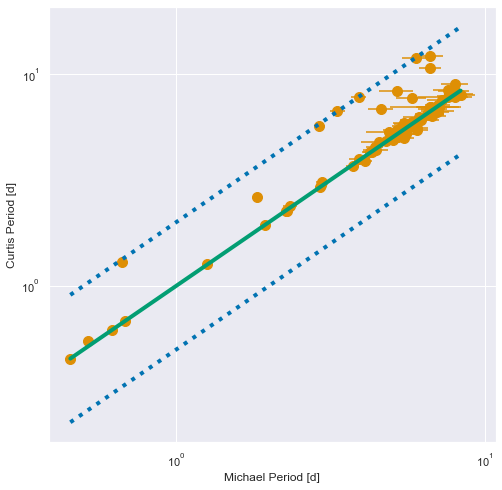

In [4]:
sns.set_style('darkgrid')
cmap = sns.color_palette('colorblind', 8)

s = df.Pflag <= 256

fig = plt.figure(figsize=(8,8))
plt.scatter(df.P[s], psceri_full['Prot'][s], s=100, c=cmap[1])
plt.errorbar(df.P[s], psceri_full['Prot'][s], xerr=df.Perr[s], fmt='|', zorder=0, c=cmap[1])

x = np.linspace(df.P.min(), df.P.max())
plt.plot(x, 2*x, ls=':', lw=4, c=cmap[0])
plt.plot(x, 0.5*x, ls=':', lw=4, c= cmap[0])
plt.plot(x, x, lw=4, c=cmap[2])

plt.xlabel('Michael Period [d]')
plt.ylabel('Curtis Period [d]')
plt.yscale('log')
plt.xscale('log')

In [10]:
np.min(df.loc[0, 'P'], psceri_full.loc[0, 'Prot'])

ValueError: Cannot create TableLoc object with no indices

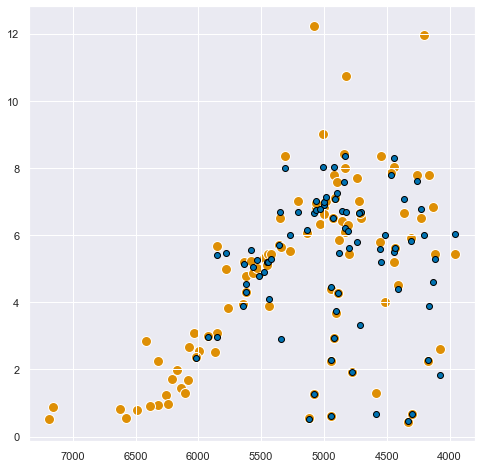

In [9]:
cmap = sns.color_palette('colorblind', 8)
fig = plt.figure(figsize=(8,8))
plt.scatter(psceri_full['Teff'], df.P, zorder=1,c=cmap[0], ec='k')
plt.scatter(psceri_full['Teff'], psceri_full['Prot'], zorder=0, ec='w', s=100, c=cmap[1])
for idx in range(len(df)):
    plt.axvline(psceri_full.loc[idx, 'Teff'], ymin = np.min)
plt.gca().invert_xaxis()

<AxesSubplot:xlabel='P', ylabel='Density'>

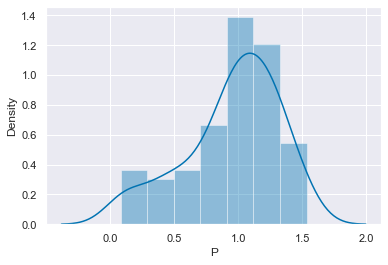

In [6]:
sns.distplot(df.P/ psceri['Prot'])